#### Forecasting Bike Sales

##### Import library

In [3]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

##### Import dataset and preprocess

In [4]:
# Chuẩn bị dữ liệu
path ="EuropeBikeSales.csv"
data = pd.read_csv(path)

df = data[['Date', 'Revenue']]
# Group by Date và tính tổng Revenue
grouped_df = df.groupby('Date').sum().reset_index()

# Chuyển đổi cột 'Date' thành kiểu datetime với định dạng 'dd/mm/yyyy'
grouped_df['Date'] = pd.to_datetime(grouped_df['Date'], format='%d/%m/%Y')

# Sắp xếp DataFrame theo cột 'Date'
df_sorted = grouped_df.sort_values(by='Date')

# In ra kết quả
print(df_sorted)
data = df_sorted

           Date  Revenue
0    2011-01-01    12821
682  2011-01-02    11868
1358 2011-01-03    31175
1512 2011-01-04    18909
1574 2011-01-05     4675
...         ...      ...
1231 2016-07-27    14094
1293 2016-07-28    19102
1349 2016-07-29    19329
1467 2016-07-30    14761
1507 2016-07-31    25570

[1884 rows x 2 columns]


Phân chia dữ liệu

In [5]:
# Scaler data
price = data['Revenue'].values
price = price.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
price_scaled = scaler.fit_transform(price)

# Chia dữ liệu thành train test validate
train_size = int(len(price_scaled) * 0.7)
test_size = int(len(price_scaled) * 0.3)

train_data = price_scaled[:train_size]
test_data = price_scaled[train_size:]

Xây dựng thuật toán

In [6]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [7]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [8]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0],X_train.shape[1])
X_train, y_train

(array([[0.05838907, 0.05319833, 0.15835857, ..., 0.11605373, 0.07474564,
         0.11295998],
        [0.05319833, 0.15835857, 0.09154884, ..., 0.07474564, 0.11295998,
         0.18957929],
        [0.15835857, 0.09154884, 0.01401991, ..., 0.11295998, 0.18957929,
         0.11143489],
        ...,
        [0.05741955, 0.08310094, 0.07421186, ..., 0.10483344, 0.02038715,
         0.17963899],
        [0.08310094, 0.07421186, 0.10376043, ..., 0.02038715, 0.17963899,
         0.10200658],
        [0.07421186, 0.10376043, 0.02430881, ..., 0.17963899, 0.10200658,
         0.07928277]]),
 array([0.18957929, 0.11143489, 0.0564228 , ..., 0.10200658, 0.07928277,
        0.08323166]))

In [9]:
model = RandomForestRegressor(n_estimators=50)
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50)

In [10]:
# Dự báo
test_predict = model.predict(X_test)
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
y_test = scaler.inverse_transform([y_test])
test_predict

array([[ 20335.06],
       [ 23158.88],
       [ 20427.58],
       [ 19519.24],
       [ 24636.38],
       [ 17080.3 ],
       [ 22291.32],
       [ 15583.78],
       [ 22059.86],
       [ 17825.56],
       [ 25755.56],
       [ 20818.84],
       [ 26524.16],
       [ 21305.92],
       [ 30834.06],
       [ 29328.78],
       [ 22901.98],
       [ 26633.02],
       [ 20186.08],
       [ 27238.14],
       [ 26858.74],
       [ 22070.08],
       [ 21113.92],
       [ 24045.34],
       [ 23241.34],
       [ 24780.44],
       [ 24690.82],
       [ 24954.66],
       [ 22076.98],
       [ 24792.5 ],
       [ 24555.08],
       [ 27119.24],
       [ 20156.94],
       [ 27071.  ],
       [ 20259.16],
       [ 28281.88],
       [ 22088.66],
       [ 23130.9 ],
       [ 22492.3 ],
       [ 23529.06],
       [ 22712.52],
       [ 26512.62],
       [ 29412.06],
       [ 17939.32],
       [ 17959.82],
       [ 17395.22],
       [ 20861.7 ],
       [ 22116.82],
       [ 20384.74],
       [ 21941.04],


Dự báo 30 ngày kế

In [11]:
# Dự báo giá trị 30 ngày trong tương lai
last_30_days = data['Revenue'].values[-30:]
next_30_days = []

for i in range(30):
    x = last_30_days[-time_step:].reshape(1, time_step)
    y_hat = model.predict(x)
    next_30_days.append(y_hat)
    last_30_days = np.append(last_30_days, y_hat)

next_30_days = np.array(next_30_days).reshape(-1, 1)
next_30_days = scaler.inverse_transform(next_30_days)

print(next_30_days)

[[81572.32]
 [72629.94]
 [73733.2 ]
 [75533.6 ]
 [73642.56]
 [66802.14]
 [67618.42]
 [67153.9 ]
 [66602.76]
 [57883.38]
 [58076.22]
 [56424.44]
 [56597.74]
 [56618.84]
 [57242.34]
 [56556.1 ]
 [55292.38]
 [62699.68]
 [63714.  ]
 [62299.9 ]
 [63979.82]
 [63756.04]
 [60214.18]
 [61098.1 ]
 [60993.66]
 [65586.52]
 [66283.64]
 [62605.16]
 [66167.46]
 [66721.32]]


Vẽ đồ thị

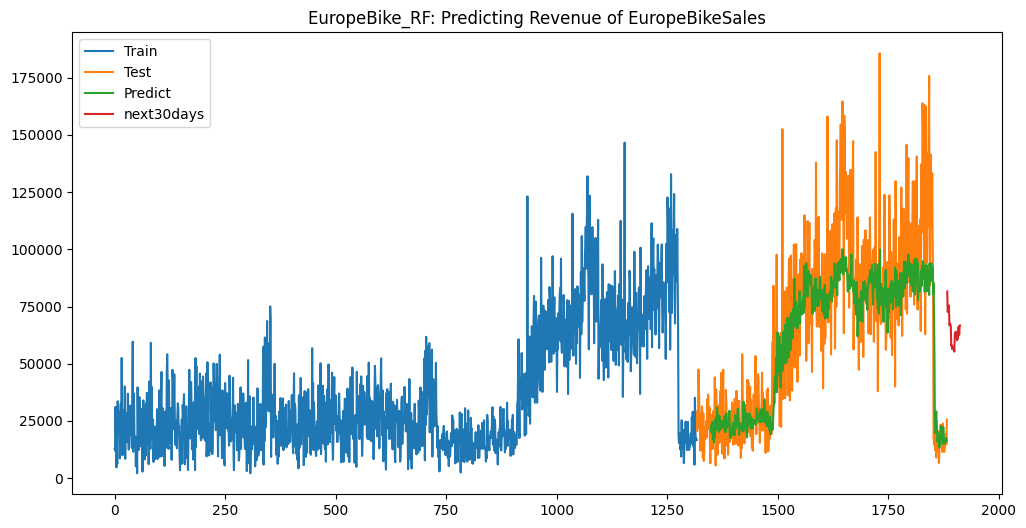

In [13]:
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 6))

# train
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data), label="Train")
# plt.plot([*train_range], pred_train.squeeze(), label="Predict Train", linestyle="dotted", color = color_palette[1])

# test
test_data_index = pd.RangeIndex(start=len(data) - len(test_data), stop=len(data), step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data), label="Test")

test_data_index = pd.RangeIndex(start=train_size+31, stop=len(data), step=1)
plt.plot(test_data_index, test_predict.squeeze(), label="Predict", linestyle="-")

#30 days
predict_data_index = pd.RangeIndex(start=len(data), stop=len(data) + 30, step=1)
plt.plot(predict_data_index, next_30_days.squeeze(), label="next30days")


# # Dự đoán 30 điểm tiếp theo
plt.legend()
plt.title('EuropeBike_RF: Predicting Revenue of EuropeBikeSales')
plt.show()

In [ ]:
# Tính toán RMSE, MAE và MAPE trên tập test
test_score_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
test_score_mape = mean_absolute_percentage_error(y_test[0], test_predict[:, 0]) * 100
test_mae = mean_absolute_error(y_test[0], test_predict[:, 0])

print('RMSE:', test_score_rmse)
print('MAPE:', test_score_mape)
print(f'MAE: {test_mae}')

RMSE: 22727.589916328467
MAPE: 28.605956401250594
MAE: 16452.965607476635
